[개념 정리]

K-평균: 군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법
- K-평균의 동작 방식
    1. 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓음
    2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속
    3. 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동
    4. 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 소속 변경
    5. 다시 중심을 소속된 데이터의 평균 중심으로 이동
    6. 중심점을 이동했는데 데이터의 중심점 소속 변경이 없으면 군집화 종료
- 장점
    - 일반적인 군집화에서 가장 많이 활용되는 알고리즘, 쉽고 간결
- 단점
    - 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐
    - 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
    - 몇 개의 군집을 선택해야 할지 가이드하기가 어려움

사이킷런 KMeans 클래스
- 주요 파라미터
    - n_clusters: 가장 중요한 파라미터, 군집 중심점의 개수
    - init: 초기에 군집 중심점의 좌표를 설정할 방식
    - max_iter: 최대 반복 횟수
- 주요 속성
    - labels_: 각 데이터 포인트가 속한 군집 중심점 레이블
    - cluster_centers_: 각 군집 중심점 좌표

군집화용 데이터 생성기
- make_blobs(): 개별 군집의 중심점과 표준 편차 제어 기능 추가
    - 피처 데이터 세트와 타깃 데이터 세트가 튜플로 반
    - 호출 파라미터: n_samples, n_features, centers, cluster_std
- make_classification(): 노이즈를 포함한 데이터를 만드는 데 유용
- make_circle(), make_moon 등

군집 평가
- 실루엣 분석: 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지를 나타냄
    - 효율적으로 잘 분리 = 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있음
    - 실루엣 계수를 기반으로 함, 개별 데이터가 가지는 군집화 지표
    - 실루엣 계수 s(i): (b(i)-a(i)) / (max(a(i),b(i)))
        - a(i): 해당 데이터 포인트와 같은 군집 내의 다른 데이터 포인트와의 거리를 평균한 값
        - b(i): 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리
- 좋은 군집화의 조건
    - 전체 실루엣의 평균값이 0에서 1사이의 값을 가짐
    - 개별 군집의 평균값의 편차가 크지 않아야 함

[코드 필사]

In [1]:
#class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
#                             precompute_distances='auto', verbose=0, random_state=None,
#                             copy_x=True, n_jobs=1, algorithm='auto')

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
#더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF=pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length',
                                            'petal_width'])
irisDF.head(3)

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2

In [3]:
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [4]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [5]:
irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_
iris_result=irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [6]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)

irisDF['pca_x']=pca_transformed[:, 0]
irisDF['pca_y']=pca_transformed[:, 1]
irisDF.head(3)

sepal_length  sepal_width  petal_length  petal_width  target  cluster  \
0           5.1          3.5           1.4          0.2       0        1   
1           4.9          3.0           1.4          0.2       0        1   
2           4.7          3.2           1.3          0.2       0        1   

      pca_x     pca_y  
0 -2.684126  0.319397  
1 -2.714142 -0.177001  
2 -2.888991 -0.144949

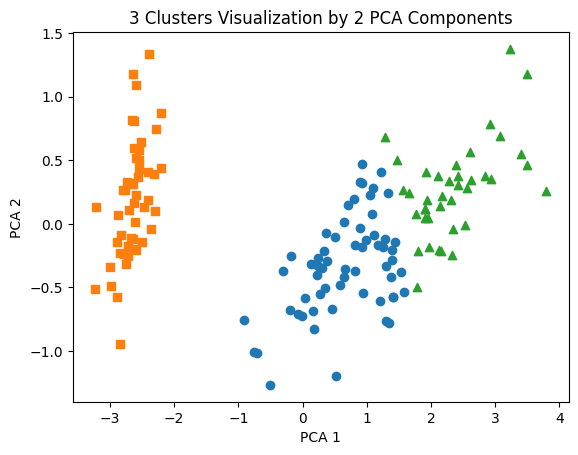

In [7]:
#군집 값이 0, 1, 2인 경우마다 별도의 인덱스를 추출
marker0_ind=irisDF[irisDF['cluster']==0].index
marker1_ind=irisDF[irisDF['cluster']==1].index
marker2_ind=irisDF[irisDF['cluster']==2].index

#군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y=make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

#y target 값의 분포를 확인
unique, counts=np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [9]:
import pandas as pd

clusterDF=pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y
clusterDF.head(3)

ftr1      ftr2  target
0 -1.692427  3.622025       2
1  0.697940  4.428867       0
2  1.100228  4.606317       0

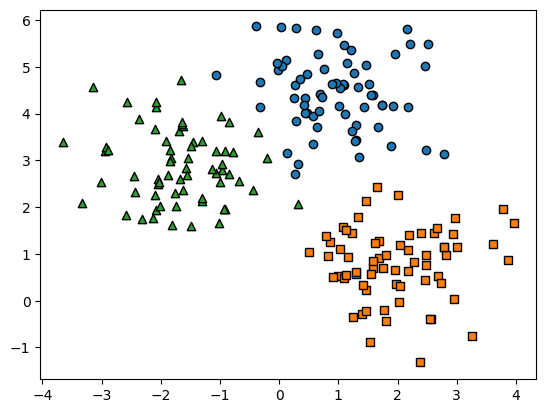

In [10]:
target_list=np.unique(y)
#각 타깃별 산점도의 마커 값
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
#3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
#target==0, target==1, target==2로 scatter plot을 marker 별로 생성
for target in target_list:
    target_cluster=clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
                marker=markers[target])
plt.show()

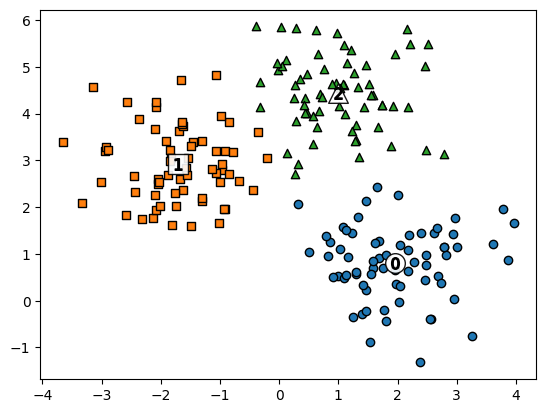

In [11]:
#KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels=kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels

#cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers=kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o', 's', '^', 'P', 'D', 'H', 'x']

#군집된 label 유형 별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
    label_cluster=clusterDF[clusterDF['kmeans_label']==label]
    center_x_y=centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                marker=markers[label])

    #군집 별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
              alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
              marker='$%d$'%label)
plt.show()

In [12]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64




---



In [13]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
#실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris=load_iris()
feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(data=iris.data, columns=feature_names)
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster']=kmeans.labels_

#iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples=silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

#irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff']=score_samples

#모든 데이터의 평균 실루엣 계수 값을 구함
average_score=silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score: {0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score: 0.551


sepal_length  sepal_width  petal_length  petal_width  cluster  \
0           5.1          3.5           1.4          0.2        1   
1           4.9          3.0           1.4          0.2        1   
2           4.7          3.2           1.3          0.2        1   

   silhouette_coeff  
0          0.852582  
1          0.814916  
2          0.828797

In [14]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.422323
1    0.797604
2    0.436842
Name: silhouette_coeff, dtype: float64

In [15]:
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

def visualize_silhouette(cluster_lists, X_features):
    #입력값으로 클러스터링 개수들을 리스트로 받아서, 각 개수 별로 클러스터링을 적용하고 실루엣 계수를 구함
    n_cols=len(cluster_lists)

    #plt.subplots()으로 리스트에 기재된 클러스터링 수 만큼의 sub figures를 가지는 axs 생성
    fig, axs=plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    #리스트에 기재된 클러스터링 개수들을 차례로 iteration 수행하면서 실루엣 계수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        #KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer=KMeans(n_clusters=n_cluster, max_iter=500, random_state=0)
        cluster_labels=clusterer.fit_predict(X_features)

        sil_avg=silhouette_score(X_features, cluster_labels)
        sil_values=silhouette_samples(X_features, cluster_labels)

        y_lower=10
        axs[ind].set_title('Number of Cluster: '+ str(n_cluster)+'\n' \
                          'Silhouette Score:' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  #Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        #클러스터링 개수별로 fill_betweenx()형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values=sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i=ith_cluster_sil_values.shape[0]
            y_upper=y_lower + size_cluster_i

            color=cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower=y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [16]:
#visualize_silhouette([2,3,4,5], X_features)

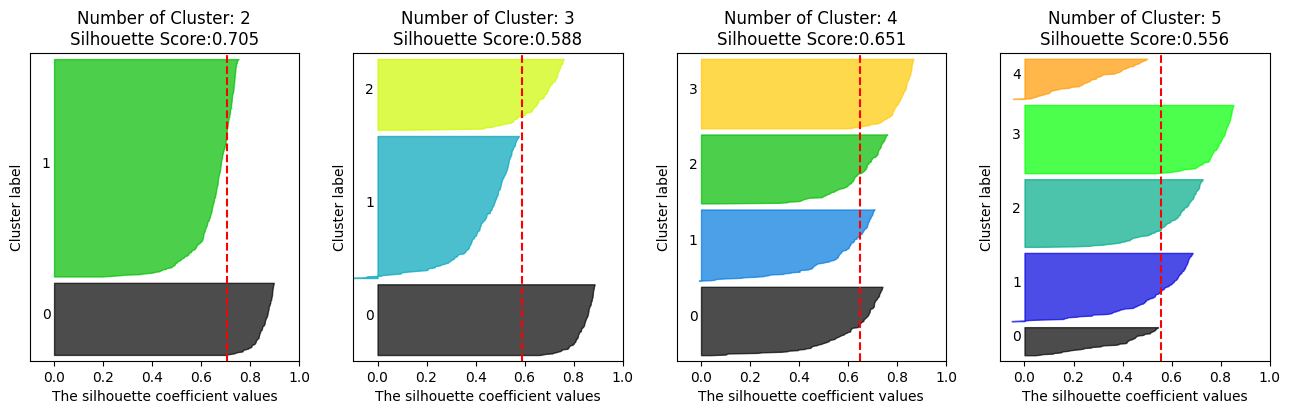

In [17]:
#make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y=make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
            center_box=(-10.0, 10.0), shuffle=True, random_state=1)

#군집 개수가 2개, 3개, 4개, 5개일 때 군집 별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5], X)

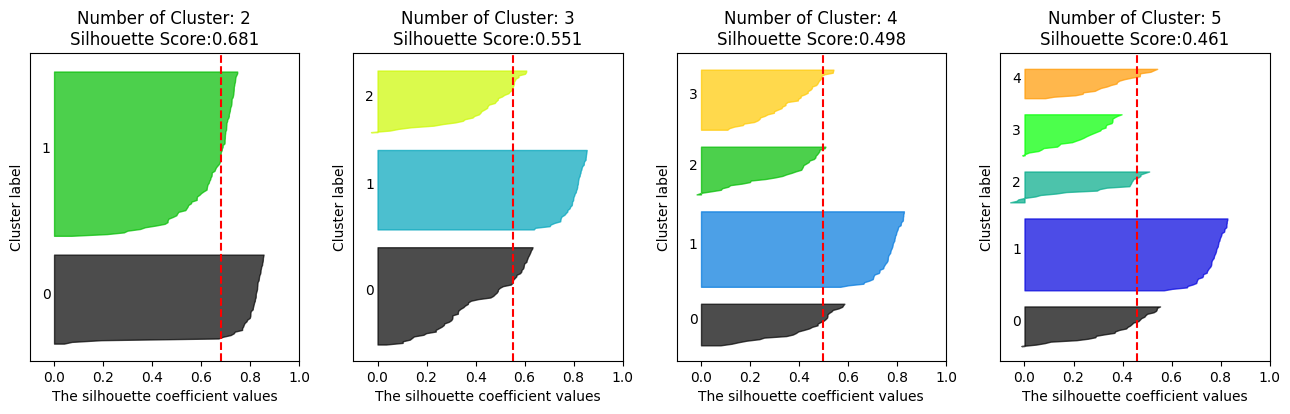

In [18]:
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2,3,4,5], iris.data)